# Kweather 데이터에 대한 관찰 코드

https://www.kaggle.com/izzettunc/introduction-to-time-series-clustering

## 1. Parameter Setting

In [2]:
import sys
sys.path.append("../")
sys.path.append("../..")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14, 4)

# 1.Data ingestion parameter
import pandas as pd
from datetime import timedelta
duration_day = 1 # 1 or 7
start_time = pd.to_datetime("2021-02-25 00:00:00")
end_time = start_time + timedelta(days = duration_day)
    
db_name = 'farm_strawberry_open'
feature_list = ['outSunshine']# ['in_noise','in_pm01', 'in_pm01_raw', 'in_pm10', 'in_pm10_raw', 'in_pm25','in_pm25_raw', 'in_temp', 'voc']
feature_name = feature_list[0]

# 2.Data manipulation parameter
freq_min = 60
import datetime
timedelta_frequency_sec = datetime.timedelta(minutes= freq_min)
# 3. Nan Processing Parameter
# 3-1. NanLImitProcessingInfo = {'type':'ratio', 'ConsecutiveNanLimit':0.05, 'totalNaNLimit':1} # seconds
# 3-2. NanLImitProcessingInfo = {'type':'time', 'ConsecutiveNanLimit':1*60*60, 'totalNaNLimit':5*60*60} #seconds
# 3-3.
NanInfoForClenData = {'type':'num', 'ConsecutiveNanLimit':1, 'totalNaNLimit':3}

In [ ]:
from clust.ingestion.influx import influx_Client_v2 as influx_Client, multipleDataSets
from setting import influx_setting_KETI as ins
db_client = influx_Client.influxClient(ins.CLUSTDataServer2)

dataSet = multipleDataSets.get_all_msdata_in_bucket(start_time, end_time, db_client, db_name)

In [ ]:
dataSet

In [3]:
from clust.quality.NaN import clean_feature_data
CMS = clean_feature_data.CleanFeatureData(feature_list, timedelta_frequency_sec)

In [4]:
# 각 데이터에 대한 Series Data를 만드는 코드
duration = {"start_time": start_time, "end_time":end_time}
dataSet, dataSetName, NaNRemovedDataSet, imputedDatasetName, ImputedDataSet  = CMS.getMultipleCleanDataSetsByFeature(dataSet, NanInfoForClenData, duration) 

======= PF_0000029_01_Jeollanamdo_Hwasun =======
======= PF_0000031_01_Jeollanamdo_Gangjin =======
======= PF_0000032_01_Jeollanamdo_Damyang =======
======= PF_0000374_01_Jeollabukdo_Gimje =======
======= PF_0001300_01_Jeollanamdo_Damyang =======
======= PF_0001301_01_Jeollanamdo_Gangjin =======
======= PF_0001303_01_Jeollanamdo_Hwasun =======
======= PF_0001306_01_Jeollanamdo_Jangseong =======
======= PF_0001382_01_Jeollanamdo_Hwasun =======
======= PF_0002290_01_Jeollanamdo_Boseong =======
======= PF_0002297_01_Jeollanamdo_Jangseong =======
======= PF_0002303_01_Jeollanamdo_Hwasun =======
======= PF_0002305_01_Jeollanamdo_Hwasun =======
======= PF_0002381_01_Gyeongsangnamdo_Miryang =======
======= PF_0002523_01_Jeollabukdo_Buan =======
======= PF_0002884_01_Gwangju_Gwangsan =======
======= PF_0006005_01_Jeollanamdo_Boseong =======
======= PF_0006006_01_Jeollanamdo_Boseong =======
======= PF_0006020_01_Chungcheongbukdo_Cheongju =======
======= PF_0006021_01_Chungcheongbukdo_Okcheon ==

In [5]:
len(dataSetName[feature_name]), len(imputedDatasetName[feature_name])

(45, 22)

In [6]:
fig_width_num = 4
fig_width = 25
fig_height = 45
feature_dataset= ImputedDataSet[feature_name]
feature_datasetName = imputedDatasetName[feature_name]

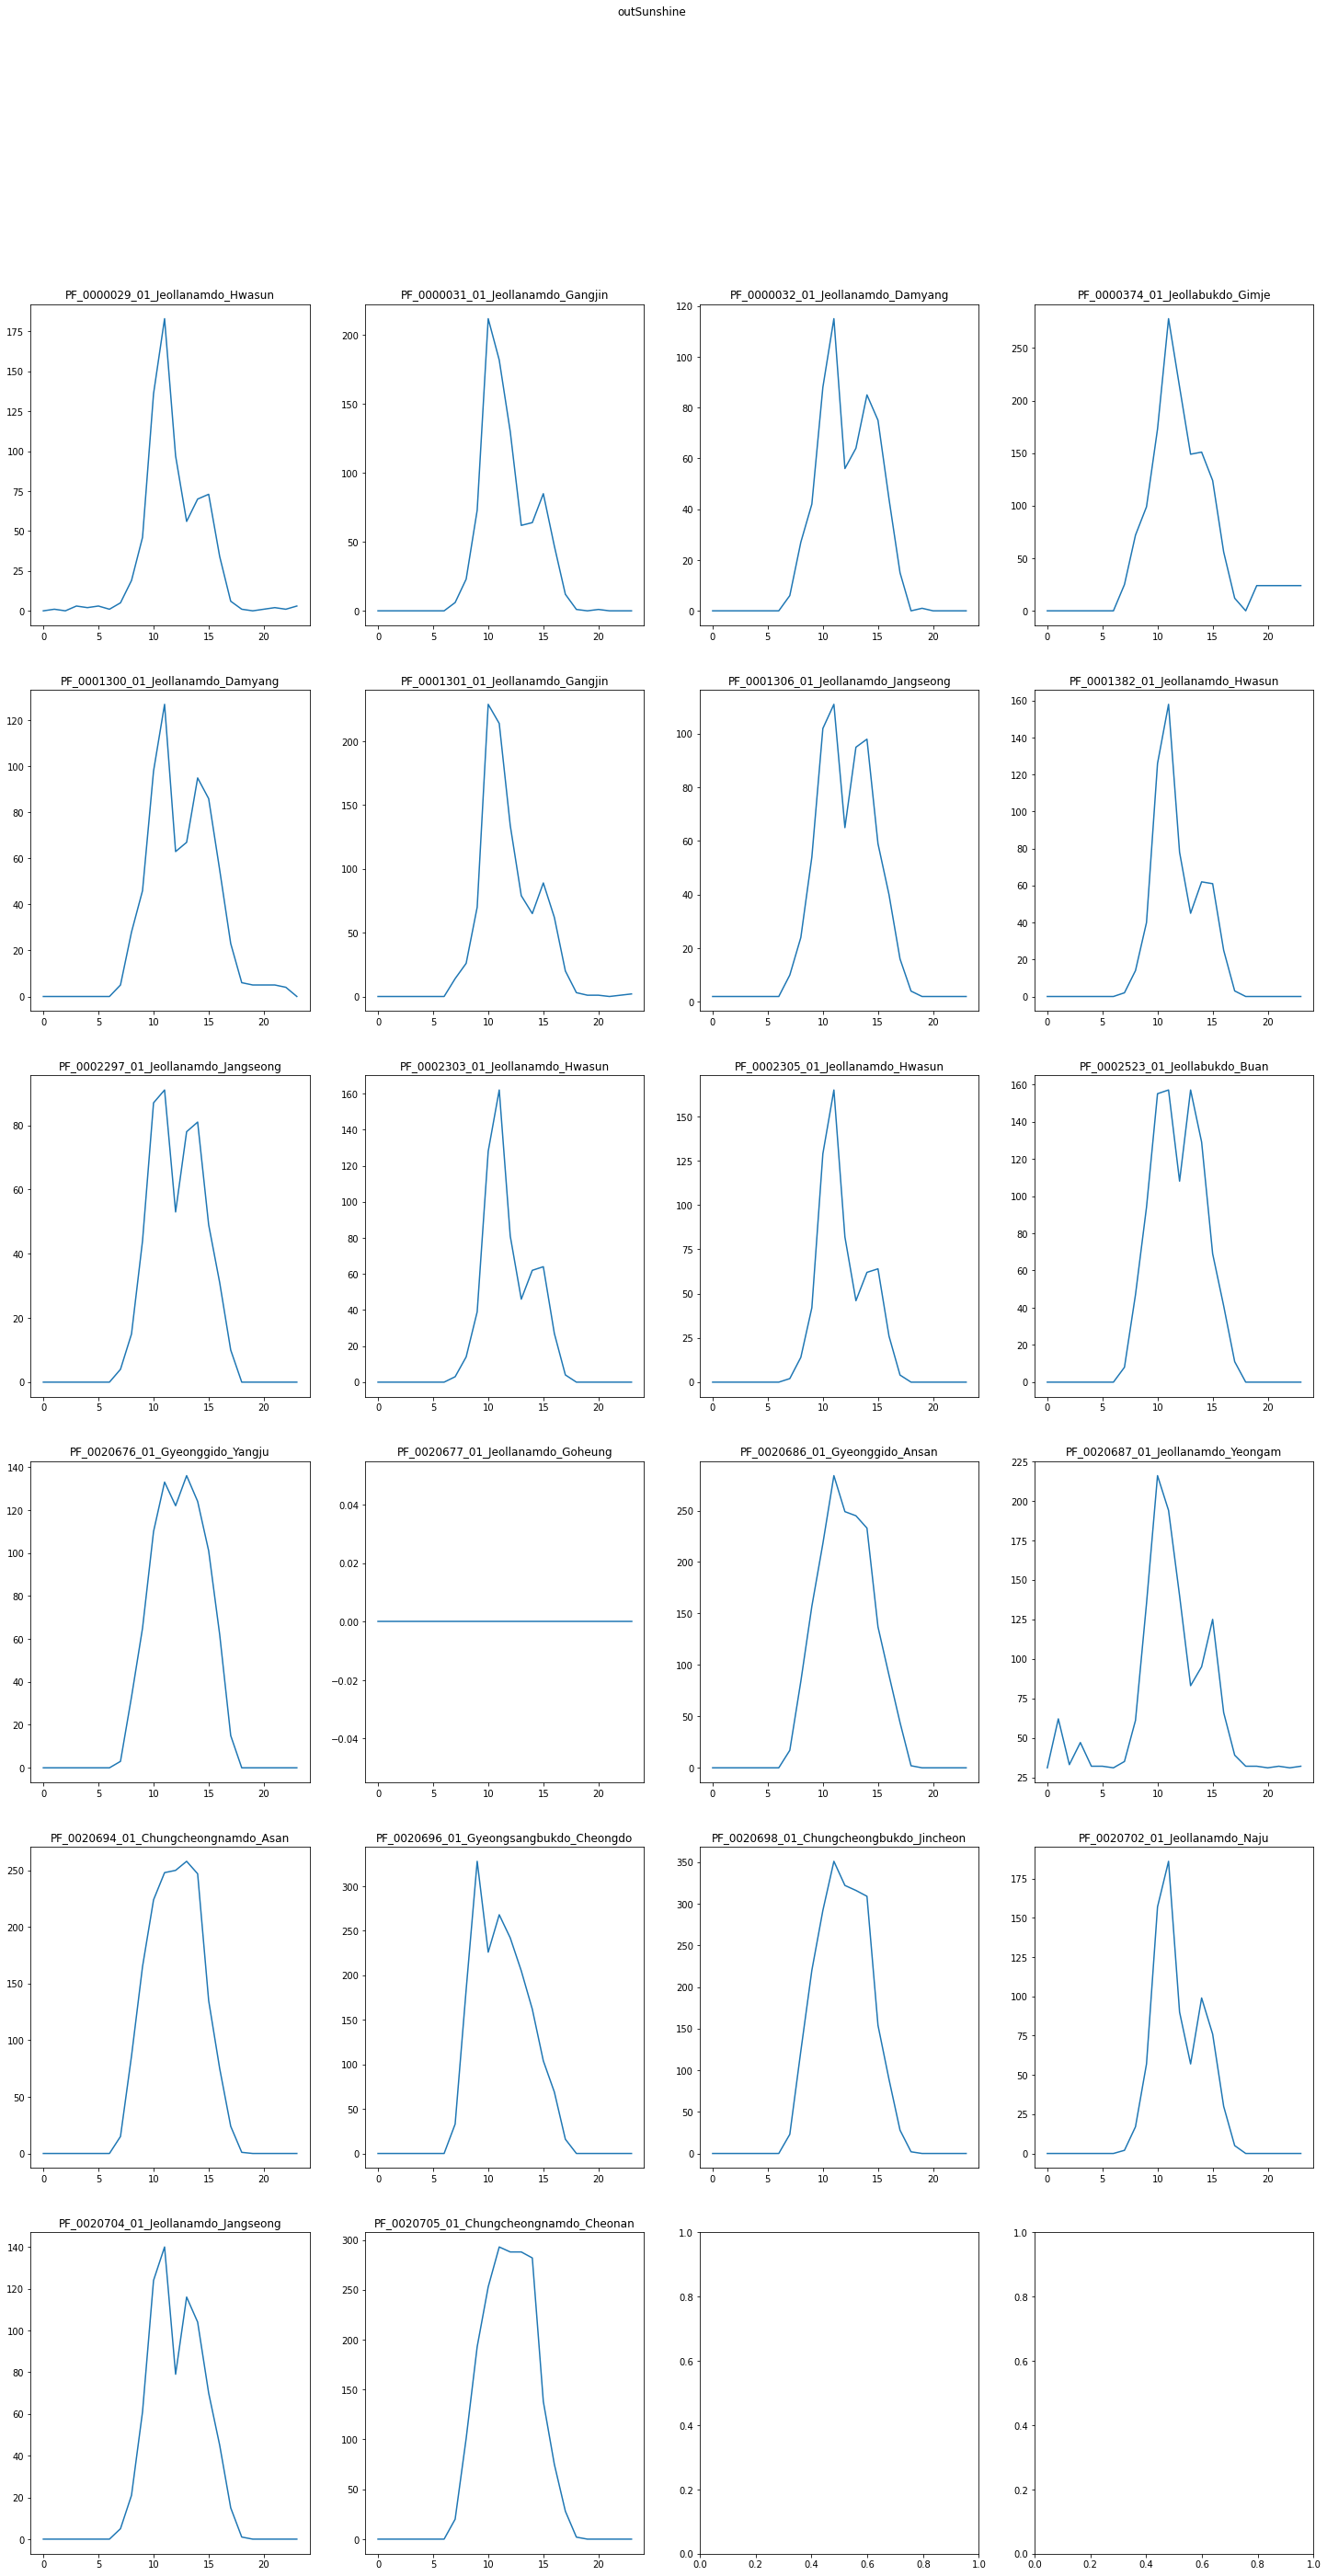

In [7]:
from clust.ML.clustering import plot_seriesDataSet
plt = plot_seriesDataSet.groupSeriesFig(fig_width, fig_height, feature_dataset, feature_datasetName, feature_name, fig_width_num )
plt.show()

## Analysis를 위한 전처리 및 분석 수행

## Clustering 
### Clustering 1 - SOM

dict_keys([(0, 1), (1, 0), (2, 2), (1, 2), (2, 1), (0, 2), (2, 0), (1, 1)])


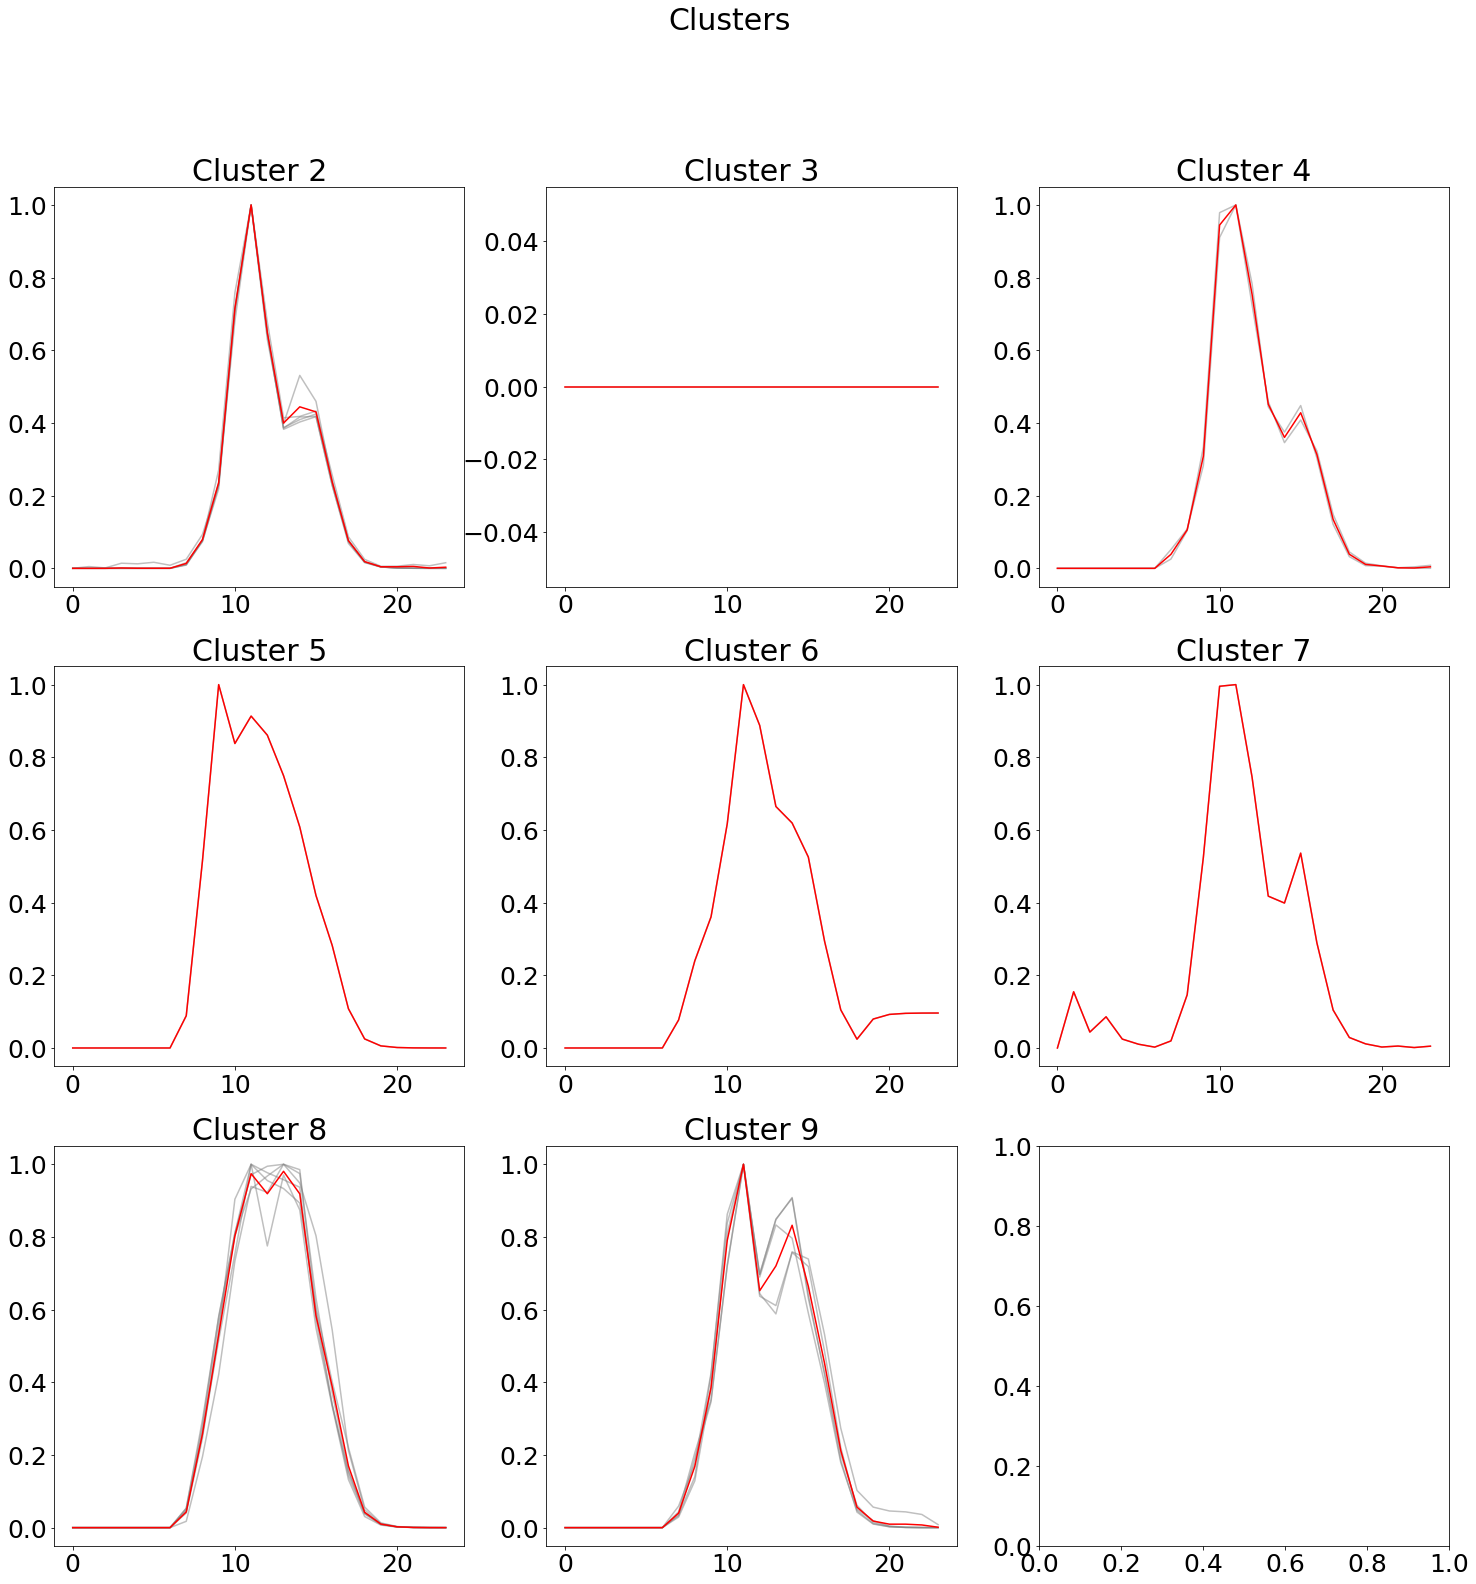

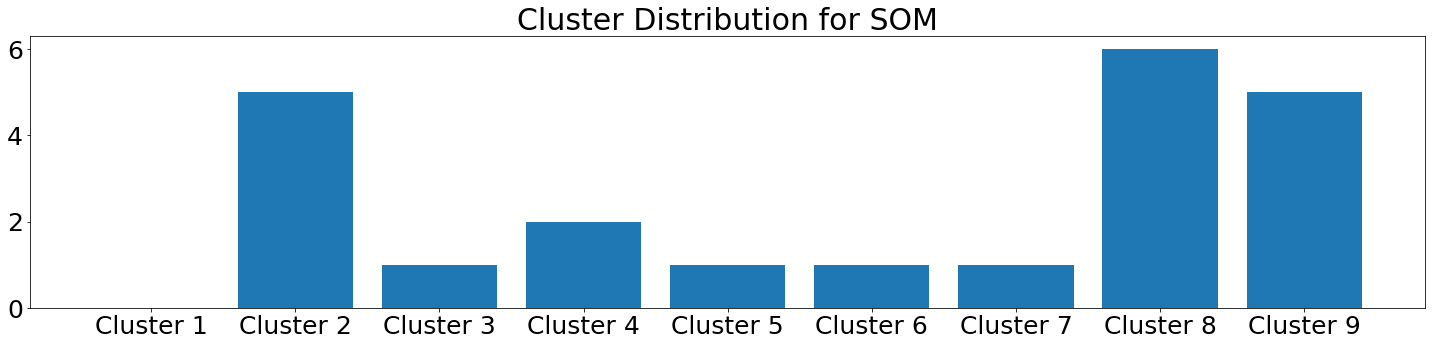

In [8]:
from clust.ML.clustering import interface

model="som"
feature_dataset= ImputedDataSet[feature_name]
feature_datasetName = imputedDatasetName[feature_name]
result, fig1, fig2 = interface.clusteringByMethod(feature_dataset, feature_datasetName, model, 2, 2)

In [9]:
result

{'PF_0000029_01_Jeollanamdo_Hwasun': '2',
 'PF_0000031_01_Jeollanamdo_Gangjin': '4',
 'PF_0000032_01_Jeollanamdo_Damyang': '9',
 'PF_0000374_01_Jeollabukdo_Gimje': '6',
 'PF_0001300_01_Jeollanamdo_Damyang': '9',
 'PF_0001301_01_Jeollanamdo_Gangjin': '4',
 'PF_0001306_01_Jeollanamdo_Jangseong': '9',
 'PF_0001382_01_Jeollanamdo_Hwasun': '2',
 'PF_0002297_01_Jeollanamdo_Jangseong': '9',
 'PF_0002303_01_Jeollanamdo_Hwasun': '2',
 'PF_0002305_01_Jeollanamdo_Hwasun': '2',
 'PF_0002523_01_Jeollabukdo_Buan': '8',
 'PF_0020676_01_Gyeonggido_Yangju': '8',
 'PF_0020677_01_Jeollanamdo_Goheung': '3',
 'PF_0020686_01_Gyeonggido_Ansan': '8',
 'PF_0020687_01_Jeollanamdo_Yeongam': '7',
 'PF_0020694_01_Chungcheongnamdo_Asan': '8',
 'PF_0020696_01_Gyeongsangbukdo_Cheongdo': '5',
 'PF_0020698_01_Chungcheongbukdo_Jincheon': '8',
 'PF_0020702_01_Jeollanamdo_Naju': '2',
 'PF_0020704_01_Jeollanamdo_Jangseong': '9',
 'PF_0020705_01_Chungcheongnamdo_Cheonan': '8'}